# Market Size of EVs

Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

### About the Data - 

| Field | Description |
| --- | --- |
| VIN (1-10) | Partial Vehicle Identification Number |
| County | The county in which the vehicle is registered |
| City | The city in which the vehicle is registered |
| State | The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state |
| Postal Code | The postal code where the vehicle is registered |
| Model Year | The year of the vehicle model |
| Make | The manufacturer of the vehicle |
| Model | The model of the vehicle |
| Electric Vehicle Type | The type of electric vehicle, e.g., Battery Electric Vehicle (BEV) |
| CAFV Eligibility | Eligibility status for clean alternative fuel vehicle programs |
| Electric Range | The maximum range of the vehicle on a single charge (in miles) |
| Base MSRP | The Manufacturer’s Suggested Retail Price |
| Legislative District | The legislative district where the vehicle is registered |
| DOL Vehicle ID | Department of Licensing Vehicle Identification |
| Vehicle Location | Geographic coordinates of the vehicle location |
| Electric Utility | The electric utility service provider for the vehicle’s location |
| 2020 Census Tract | The census tract for the vehicle’s location |

# Importing Dependencies

In [234]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from scipy.optimize import curve_fit

color = sns.dark_palette("#69d", reverse=True, as_cmap=True)
color1 = sns.dark_palette("#69d", reverse=True)


sns.set_style("whitegrid")

In [14]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


# Data PreProcessing

### Imputing Legislative District

In [15]:
impute_county_ld = pd.pivot_table(data = ev_data,index = 'County', values = 'Legislative District').reset_index()
impute_county_ld = dict(zip(impute_county_ld['County'], impute_county_ld['Legislative District']))

impute_city_ld = pd.pivot_table(data = ev_data,index = 'City', values = 'Legislative District').reset_index()
impute_city_ld = dict(zip(impute_city_ld['City'], impute_city_ld['Legislative District']))

impute_state_ld = pd.pivot_table(data = ev_data,index = 'State', values = 'Legislative District').reset_index()
impute_state_ld = dict(zip(impute_state_ld['State'], impute_state_ld['Legislative District']))

In [16]:
ev_data['Legislative District'] = ev_data['Legislative District'] .fillna(ev_data['County'].map(impute_county_ld))
ev_data['Legislative District'] = ev_data['Legislative District'] .fillna(ev_data['City'].map(impute_city_ld))
ev_data['Legislative District'] = ev_data['Legislative District'] .fillna(ev_data['State'].map(impute_state_ld))

### Dropping NAN Values

In [17]:
ev_data = ev_data.dropna()

# Exploratory Analysis

### EV Adoption Over Time

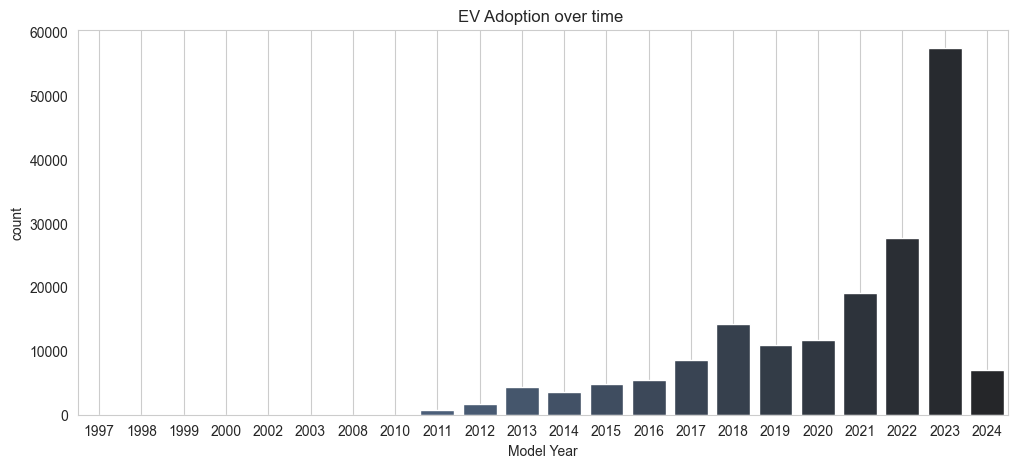

In [18]:
ev_population = ev_data['Model Year'].value_counts(ascending = False).reset_index()

plt.figure(figsize = (12,5))
sns.barplot(data = ev_population, x = 'Model Year', y = 'count', hue = 'Model Year', palette=color, legend = None)
plt.title('EV Adoption over time ')
plt.grid()
plt.show()

From above plot, It's clear the **EV adoption** increase over time, especially noting upward trend around 2016. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for **2023 being the highest** on the graph, indicating a peak in EV adoption.

### Top Cities in Top Counties by EV Registrations

In [8]:
top_counties = ev_data['County'].value_counts().head(3).index
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
top_counties_data = top_counties_data.groupby(['County','City'], as_index = False).size().sort_values(by = 'size', ascending = False).head(10)

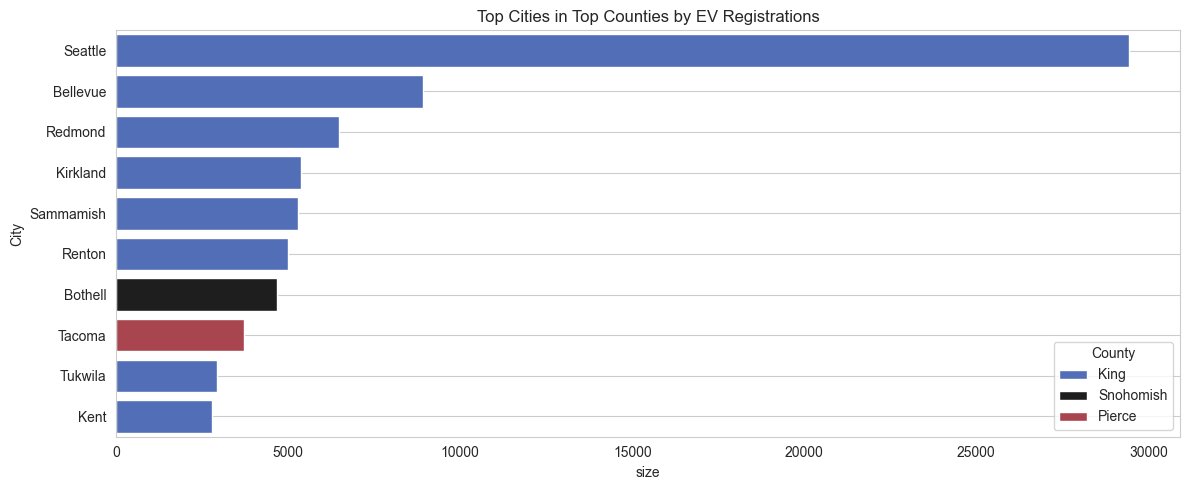

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(data=top_counties_data, y='City', x='size', hue='County', palette='icefire')
plt.title('Top Cities in Top Counties by EV Registrations')
plt.tight_layout()
plt.grid()
plt.show()

- From top 3 County, In top 10 Cities, 8 cities are from king county from which Seattle have the highest EV Registration. followed by Snohomish county's city Bothell and Pierce county's city Tacoma have the moderate Ev registations.
- Majority cities are in king county, which seems to dominate the EV registration.
- Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

### Distribution of electric vehicle types

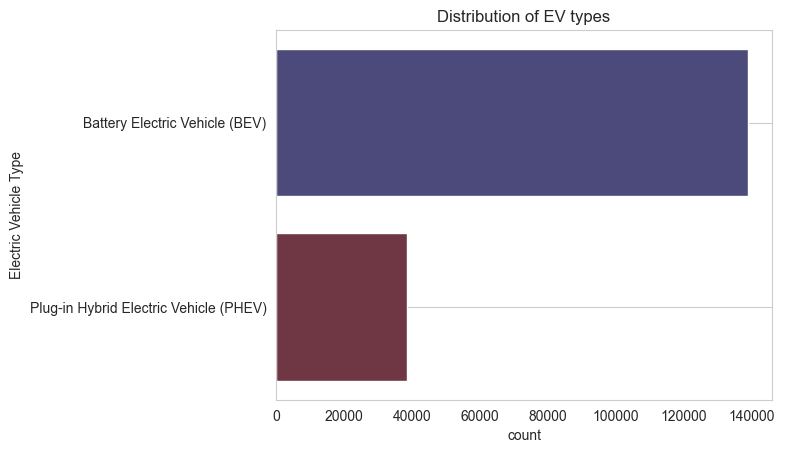

In [37]:
dist_ev = ev_data['Electric Vehicle Type'].value_counts().reset_index()
sns.barplot(data = dist_ev, y = 'Electric Vehicle Type', x = 'count', hue = 'Electric Vehicle Type', palette='icefire')
plt.title('Distribution of EV types')
plt.grid()
plt.show()

Above plot show, American prefers more BEv vechiles over PHEV vehicles.

### Top EV Producers

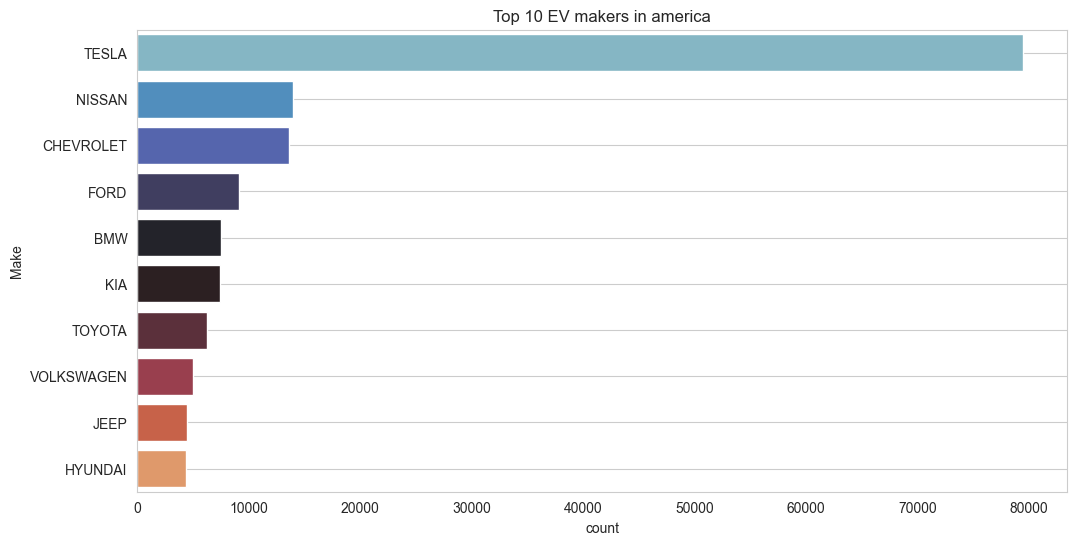

In [77]:
top10_ = ev_data['Make'].value_counts(ascending = False).reset_index().head(10)
plt.figure(figsize = (12,6))
sns.barplot(data = top10_,y = 'Make', x = 'count', hue = 'Make', palette='icefire' )
plt.title('Top 10 EV makers in america')
plt.grid()
plt.show()

From the illustration, Tesla is the top ev producer in us market followed by NIssan and other companies. This is due to, american love to buy the BEV vehicles as compared to hybrid and Tesla only produce BEV vehicles. 

### Type of EV Production by Makers

In [55]:
dist_ev = ev_data.groupby(['Make','Electric Vehicle Type']).size().sort_values(ascending = False).reset_index().head(10)

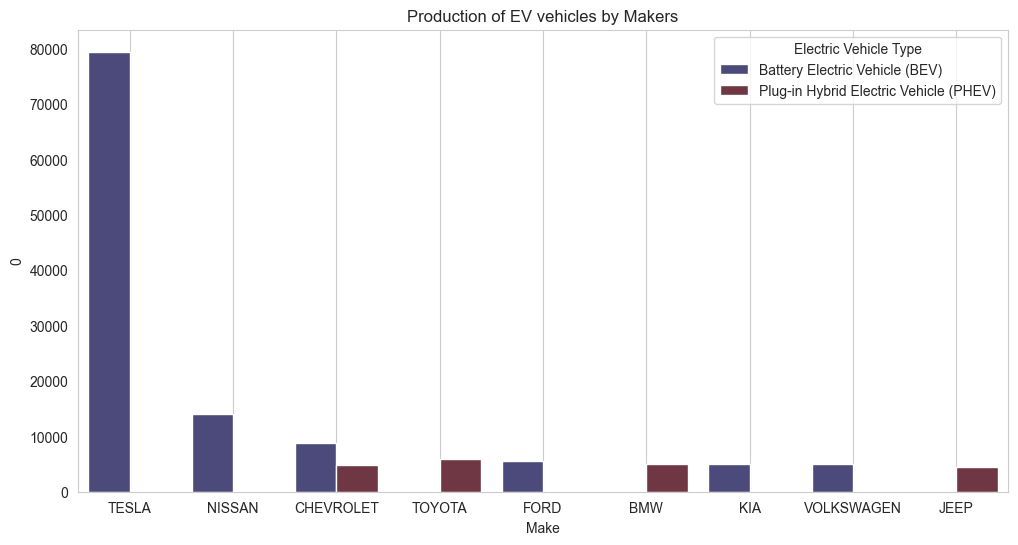

In [79]:
plt.figure(figsize = (12,6))
sns.barplot(data = dist_ev, x = 'Make', y = 0, hue = 'Electric Vehicle Type', palette='icefire')
plt.title('Production of EV vehicles by Makers')
plt.grid()
plt.show()


- **Tesla** produces only **BEVs**, dominating America's market.
- **Nissan**, **Ford**, **Kia**, and **Volkswagen** also offer **BEVs**.
- **Chevrolet** offers both **EV** types.
- **Toyota**, **BMW**, and **Jeep** specialize in **Hybrid EVs**.

### Top 10 Cars of Top 3 Makers

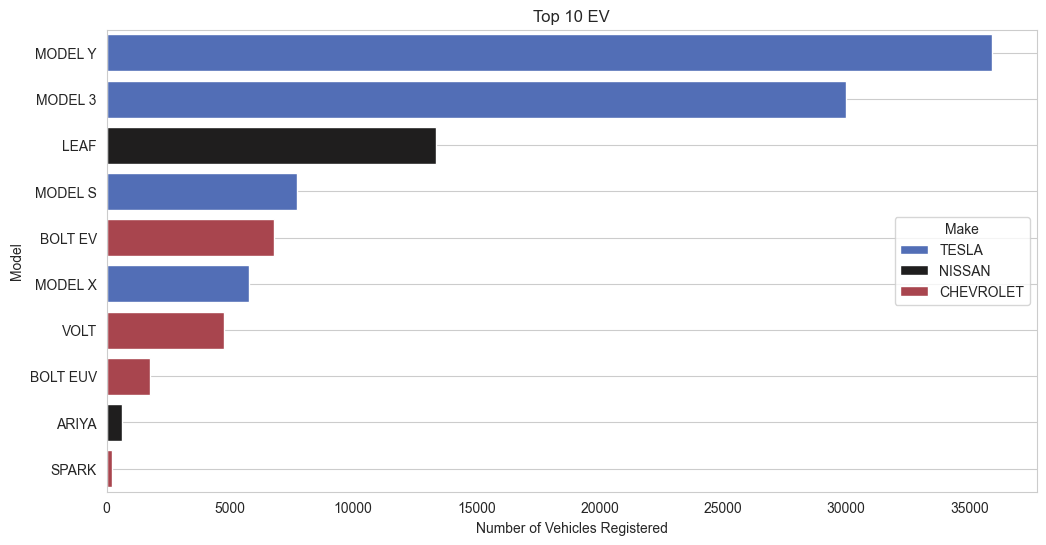

In [144]:
ev_dist = ev_data[ev_data['Make'].isin(ev_data['Make'].value_counts().head(3).index)]
ev_dist1 = ev_dist.groupby(['Make','Model']).size().sort_values(ascending  = False).head(10).reset_index()
plt.figure(figsize = (12,6))
sns.barplot(data = ev_dist1, y = 'Model', x = 0, hue = 'Make', palette = 'icefire')
plt.title('Top 10 EV')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.grid()
plt.show()

- TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
- TESLA’s MODEL S and MODEL X also have a significant number of registrations.
- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

### Electric Range

In [127]:
hybrid_ = ev_data[ev_data['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
hybrid_ = np.mean(hybrid_['Electric Range'])

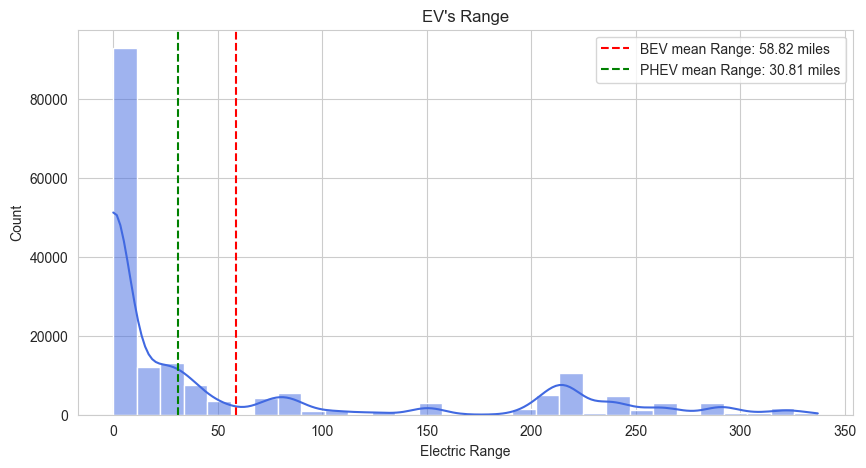

In [131]:
plt.figure(figsize = (10,5))
sns.histplot(data = ev_data['Electric Range'], kde = True, bins = 30, color = 'royalblue')
plt.title("EV's Range")

plt.axvline(np.mean(ev_data['Electric Range']), linestyle = '--', color = 'red', label=f'BEV mean Range: {ev_data["Electric Range"].mean():.2f} miles')

plt.axvline(hybrid_, linestyle = '--', color = 'green', label=f'PHEV mean Range: {hybrid_:.2f} miles')

plt.legend()
plt.show()

- There is high number of electric vehicles range less than 50 miles. On the other hand, The high numbers of hybrid electric vehicles have range less than 30 miles.
- The distribution is right skewed with long tail, which indicates ev's with higher range is less frequent.
- The mean of electric and hybrid is less as comparatively low as highest range shown in graph.
- Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

In [136]:
year_range = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

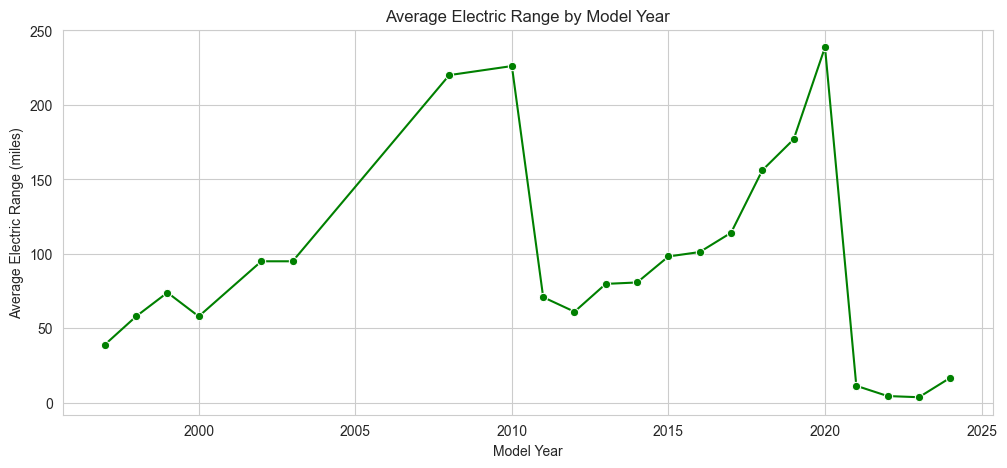

In [141]:
plt.figure(figsize = (12,5))
sns.lineplot(data = year_range, x = 'Model Year', y = 'Electric Range', color = 'green', marker = 'o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

### Top Makes EV Cars ranges

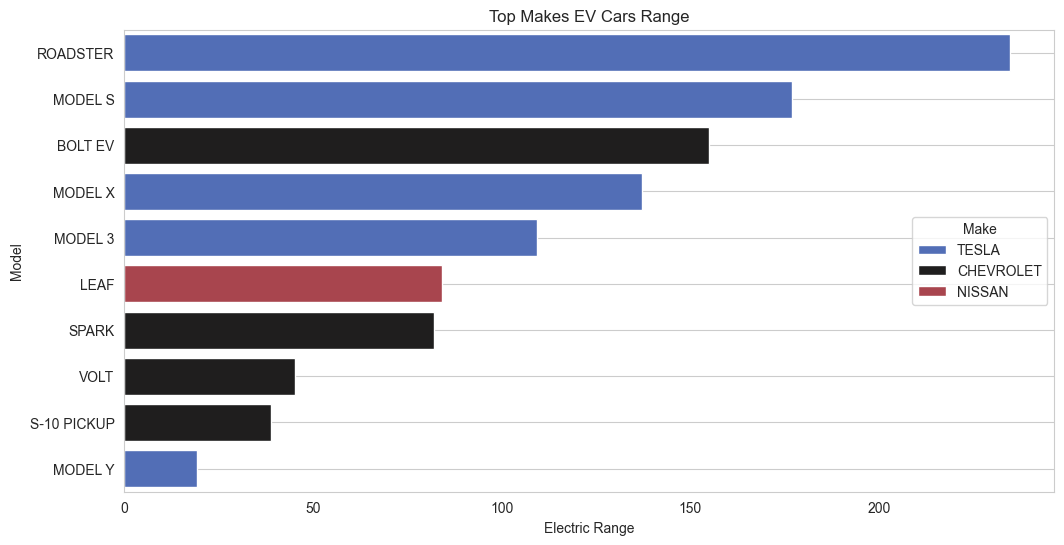

In [159]:
top_model = ev_dist.groupby(['Make','Model'])['Electric Range'].mean().sort_values(
    ascending=False).reset_index().head(10)
plt.figure(figsize = (12,6))
sns.barplot(top_model, y = 'Model', x = 'Electric Range', hue = 'Make', palette = 'icefire')
plt.legend(title = 'Make',loc = 'right')
plt.title('Top Makes EV Cars Range')
plt.grid()
plt.show()

### Distribution of CAFV Eligibility

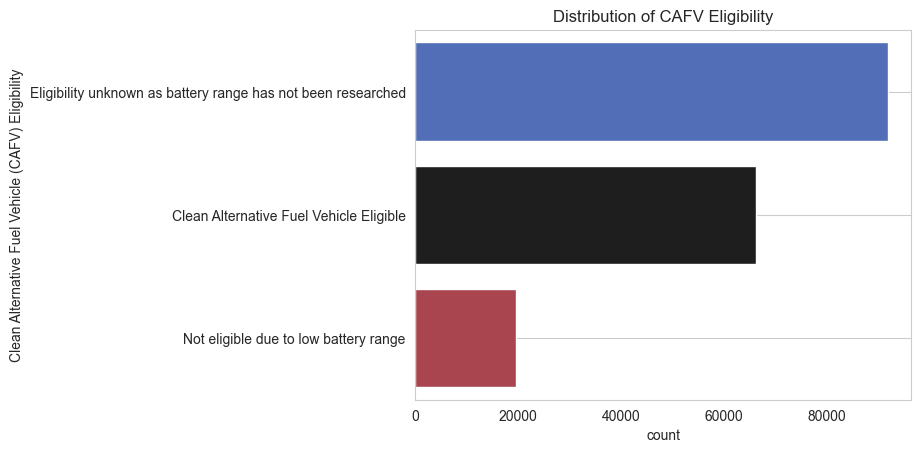

In [168]:
cafv = ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(ascending = False).reset_index()
sns.barplot(data = cafv, y = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', x = 'count', palette='icefire', hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('Distribution of CAFV Eligibility')
plt.grid()
plt.show()

- 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' is not finalised due to unknown information of battery range. Most EV cars in America is not eligibile to CAFV. Due to Incomplete information about the battery range.
- As, seen in distribution most frequent cars have high range. they all are CAFV eligible.
- From the distribution, high number of cars gave range and these ev cars have no eligibility of CAFV.

### Distribution of Make on CAFV

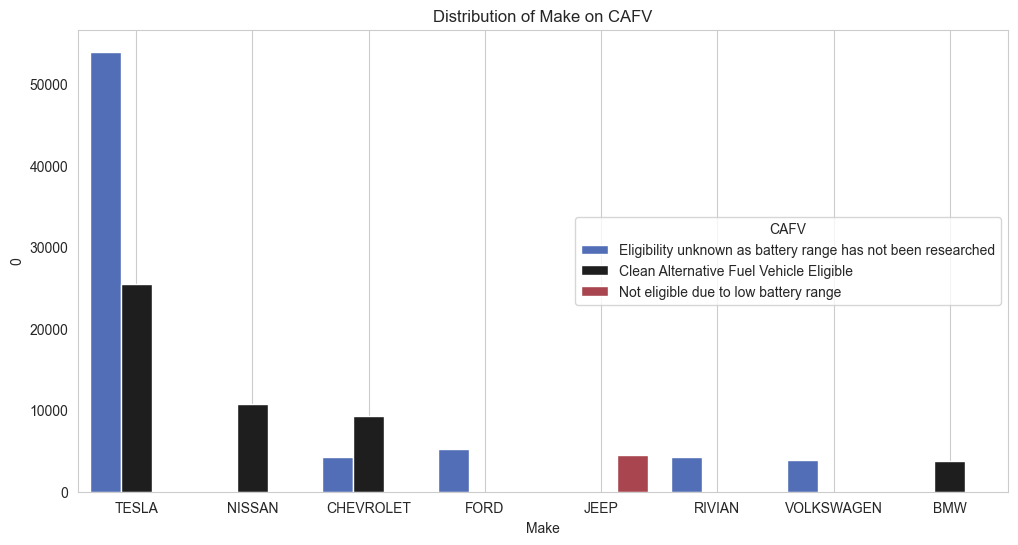

In [191]:
cafv_make = ev_data.groupby(['Clean Alternative Fuel Vehicle (CAFV) Eligibility','Make']).size().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize=(12,6))
sns.barplot(data = cafv_make, x = 'Make', y = 0, hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='icefire')
plt.title('Distribution of Make on CAFV')
plt.legend(title = 'CAFV', loc = 'right')
plt.grid()
plt.show()

### Make's Model CAFV Eligibilty

In [194]:
cafv_dist = ev_dist.groupby(['Clean Alternative Fuel Vehicle (CAFV) Eligibility','Make','Model']).size().sort_values(ascending = False).reset_index().head(10)

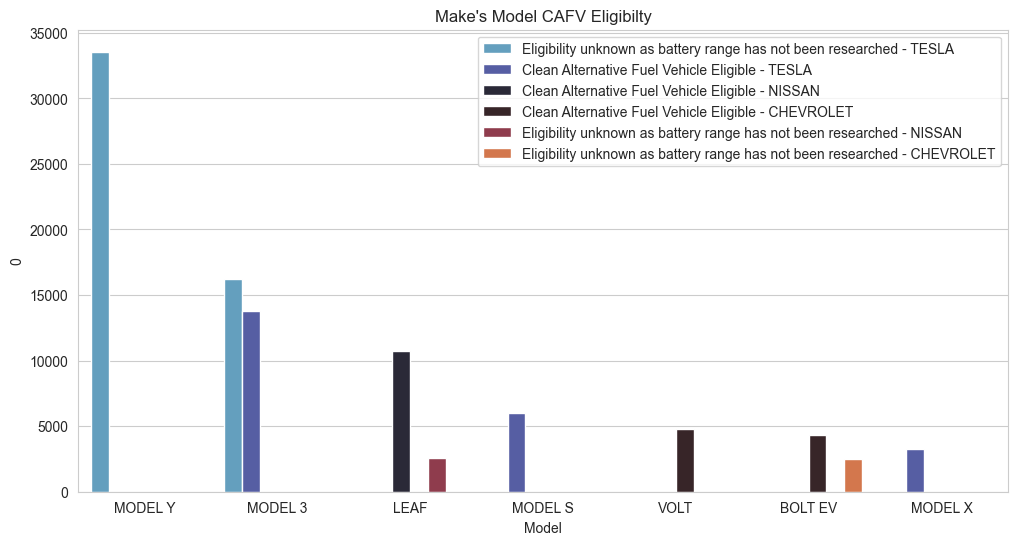

In [216]:
cafv_dist['CAFV_Make'] = cafv_dist['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] + ' - ' + cafv_dist['Make']

# Create the barplot
plt.figure(figsize=(12,6))
sns.barplot(data=cafv_dist, x='Model', y=0, hue='CAFV_Make', palette='icefire')
plt.title("Make's Model CAFV Eligibilty")
plt.legend(loc = 'best')
plt.show()

- Most model of the tesla MOdel Y battery range is not researched that why's Model is not eligible for CAFV. 
- Half of the tesla model 3 is CAFV Eligible follwed by Model S and Model X.
- Chevorlet and Nisaan most cars battery are not researched and CAFV eligible.

### Forecast

In [230]:
ev_year = ev_data['Model Year'].value_counts().sort_index(ascending = True)
ev_year = ev_year[ev_year.index <=2023]

In [245]:
def exponential_growth(x, a,b):
    return a * np.exp(b * x)

In [246]:
x_data = ev_year.index - ev_year.index.min()
y_data = ev_year.values

In [248]:
params, covariance =curve_fit(exponential_growth,x_data,y_data)

In [296]:
forecast_year = np.arange(2024, 2024+7)
forecast_values = exponential_growth(( forecast_year - ev_year.index.min()), *params)
final_forecast = dict(zip(forecast_year, forecast_values))

In [299]:
years = np.arange(ev_year.index.min(), 2030 + 2)
actual_years = ev_year.index
forecast_years_full = np.arange(2024, 2029 + 1)

In [278]:
actual_values = ev_year.values

In [283]:
forecast_ = [final_forecast[year] for year in forecast_years_full]

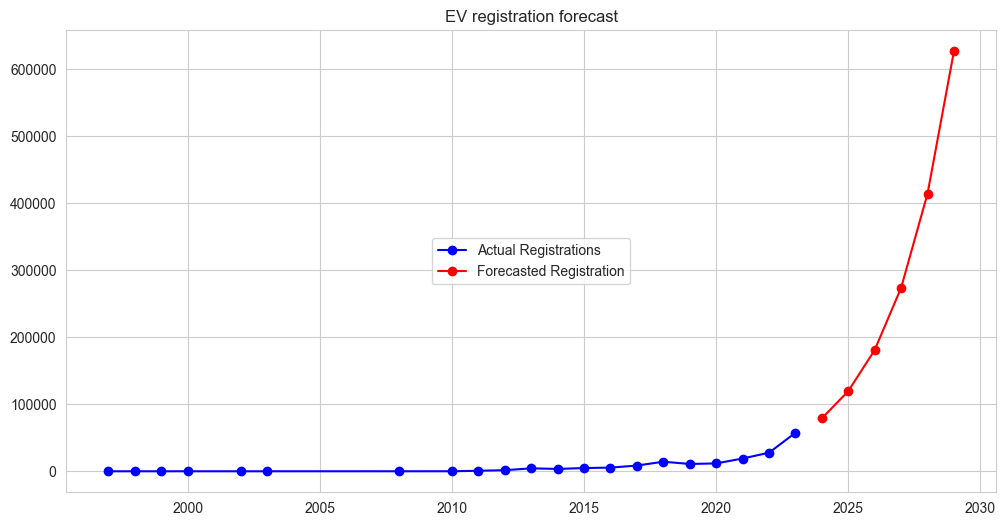

In [304]:
plt.figure(figsize = (12,6))
plt.plot(actual_years, actual_values, marker = 'o', label = 'Actual Registrations', color = 'blue')
plt.plot(forecast_years_full, forecast_, marker = 'o', label = 'Forecasted Registration', color = 'red')
plt.legend(loc = 'center')
plt.title('EV registration forecast')
plt.grid(True)
plt.show()

- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

# Summary

So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.